In [1]:
import numpy as np
import pandas as pd
import os
from tqdm import trange
import seaborn as sns
from matplotlib import pyplot as plt

# project's own imports
from data_engineering.run_analysis import trajectory_analysis
from data_engineering.metric_calculation import (
    boltzmann_metric,
    inverse_exponential_distance_metric,
    read_trajectory_data,
    get_frame_geese,
    calculate_entropy,
)

c:\Python Projects\tohoku_university\geese_project\data_engineering\metric_calculation.py:20: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+",


In [2]:
def calculate_structure_metrics(filename):
    # ====================================================================================================
    # setting values to be used from dataset
    file_column_numbers = [0, 1, 6, 7, 8, 12, 13, 14, 15, 16, 17, 18]
    file_column_names = [
        "trj_id",
        "frame",
        "xpos",
        "ypos",
        "zpos",
        "xvel",
        "yvel",
        "zvel",
        "n",
        "xi",
        "eta",
        "zeta",
    ]
    # =====================================================================================================

    # the column names of data being used for actual metrics and plotting
    column_names = [
        "trj_id",
        "xpos",
        "ypos",
        "zpos",
        "xvel",
        "yvel",
        "zvel",
        "xi",
        "eta",
        "zeta",
    ]

    # creating dataframes from function
    df, individual_geese_trjs, n_trjs = read_trajectory_data(
        filename, file_column_numbers, file_column_names
    )
    print(f"Computing metrics between birds...")

    # defining loop length
    first_frame = int(df["frame"].min())
    last_frame = int(df["frame"].max())

    # entropy list
    entropies = []
    distances_from_center = []
    distances = []
    min_distances = []
    velocity_alignments = []
    acceleration_alignments = []
    distance_spreads = []

    # starting loop
    for frame in trange(first_frame, last_frame):

        temp_distances = []


        # get geese in nice dict
        geese = get_frame_geese(frame, individual_geese_trjs, column_names)

        n_geese = len(geese)

        # track entropy
        entropy, distance_from_center, distance_spread = calculate_entropy(geese)
        entropies.append(entropy)
        distances_from_center.append(np.array(distance_from_center))
        distance_spreads.append(np.array(distance_spread))

        # iterate through geesee and calculate metric matrices
        i = -1
        for first_goose_index in geese:

            i += 1
            goose_1 = geese[first_goose_index]

            j = -1
            for second_goose_index in geese:

                j += 1
                goose_2 = geese[second_goose_index]

                if goose_1["trj_id"] == goose_2["trj_id"]:
                    pass

                else:
                        distance = np.linalg.norm(goose_1['position'] - goose_2['position'])
                        velocity_norm = np.linalg.norm(goose_1['velocity']) * np.linalg.norm(goose_2['velocity'])
                        acceleration_norm = np.linalg.norm(goose_1['acceleration']) * np.linalg.norm(goose_2['acceleration'])

                        if velocity_norm == 0:
                                velocity_alignment = 0
                        else:
                                velocity_alignment = np.dot(goose_1['velocity'], goose_2['velocity']) / velocity_norm
                        if acceleration_norm == 0:
                                acceleration_alignment = 0
                        else:
                                acceleration_alignment = np.dot(goose_1['acceleration'], goose_2['acceleration']) / acceleration_norm


                        #distances.append(distance)
                        distances.append(distance)
                        temp_distances.append(distance)
                        velocity_alignments.append(velocity_alignment)
                        acceleration_alignments.append(acceleration_alignment)
        
        min_distances.append(min(temp_distances))


    return distances, min_distances, velocity_alignments, acceleration_alignments, entropies, distances_from_center, distance_spreads


In [3]:
i = 0
distances = []
min_distances = []
velocity_alignments = []
acceleration_alignments = []
entropies = []
distances_from_center = []
distance_spreads = []

folder_path = "data/trajectory_data"
amount_of_analysises = len(os.listdir(folder_path)) - 1

for filename in os.listdir(folder_path):
    i += 1

    print(f"Starting with analysis {i} / {amount_of_analysises}")

    if filename.endswith(".trj"):
        filename = os.path.splitext(filename)[0]

        distances_calculated, min_distances_calculated, velocity_alignments_calculated, acceleration_alignments_calculated, entropies_calculated, distances_from_center_calculated, distance_spreads_calculated = calculate_structure_metrics(filename)
        distances.append(np.array(distances_calculated).flatten())
        min_distances.append(np.array(min_distances_calculated).flatten())
        velocity_alignments.append(np.array(velocity_alignments_calculated).flatten())
        acceleration_alignments.append(np.array(acceleration_alignments_calculated).flatten())

        entropies.append(entropies_calculated)
        distances_from_center.append(distances_from_center_calculated)
        distance_spreads.append(np.array(distance_spreads_calculated).flatten())





Starting with analysis 1 / 10
Computing metrics between birds...


100%|██████████| 945/945 [02:10<00:00,  7.24it/s]


Starting with analysis 2 / 10
Computing metrics between birds...


100%|██████████| 826/826 [00:17<00:00, 47.96it/s]


Starting with analysis 3 / 10
Computing metrics between birds...


100%|██████████| 823/823 [00:06<00:00, 134.31it/s]


Starting with analysis 4 / 10
Computing metrics between birds...


100%|██████████| 570/570 [00:06<00:00, 91.72it/s] 


Starting with analysis 5 / 10
Computing metrics between birds...


100%|██████████| 602/602 [00:12<00:00, 47.79it/s]


Starting with analysis 6 / 10
Computing metrics between birds...


100%|██████████| 680/680 [02:05<00:00,  5.43it/s]


Starting with analysis 7 / 10
Computing metrics between birds...


100%|██████████| 1080/1080 [01:14<00:00, 14.55it/s]


Starting with analysis 8 / 10
Computing metrics between birds...


100%|██████████| 710/710 [00:15<00:00, 45.81it/s]


Starting with analysis 9 / 10
Computing metrics between birds...


100%|██████████| 980/980 [00:42<00:00, 23.14it/s]


Starting with analysis 10 / 10
Computing metrics between birds...


100%|██████████| 819/819 [00:52<00:00, 15.48it/s]


Starting with analysis 11 / 10


In [4]:
print(distances)

[array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64)]


In [5]:
distances = np.concatenate([np.ravel(v) for v in distances if v is not None])
min_distances = np.concatenate([np.ravel(v) for v in min_distances if v is not None])
velocity_alignments = np.concatenate([np.ravel(v) for v in velocity_alignments if v is not None])
acceleration_alignments = np.concatenate([np.ravel(v) for v in acceleration_alignments if v is not None])
entropies = np.concatenate([np.ravel(v) for v in entropies if v is not None])
distance_spreads = np.concatenate([np.ravel(v) for v in distance_spreads if v is not None])

In [6]:
distances_from_center = np.concatenate([
    arr.ravel()          # flatten each individual numpy array
    for sublist in distances_from_center  # flatten the outer list
    for arr in sublist
])
print(distances_from_center)

[210.87515499 209.76772898 207.77993116 ...  73.16103712  71.68813714
  68.15101272]


In [7]:
def plot_distribution(values, title, xlabel, ylabel):

    values = values[values != 0]

    fig = plt.figure(figsize=(8, 6))

    ax = sns.histplot(values, color="blue", kde=True)
    

    for line in ax.lines:
        line.set_color('crimson')
        
    plt.grid(color="lightgrey")

    # figure prettiness
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.tight_layout()
   
    plt.show()


In [8]:
print(distances)

[]


c:\Users\luigi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\luigi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\luigi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\luigi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\luigi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret 

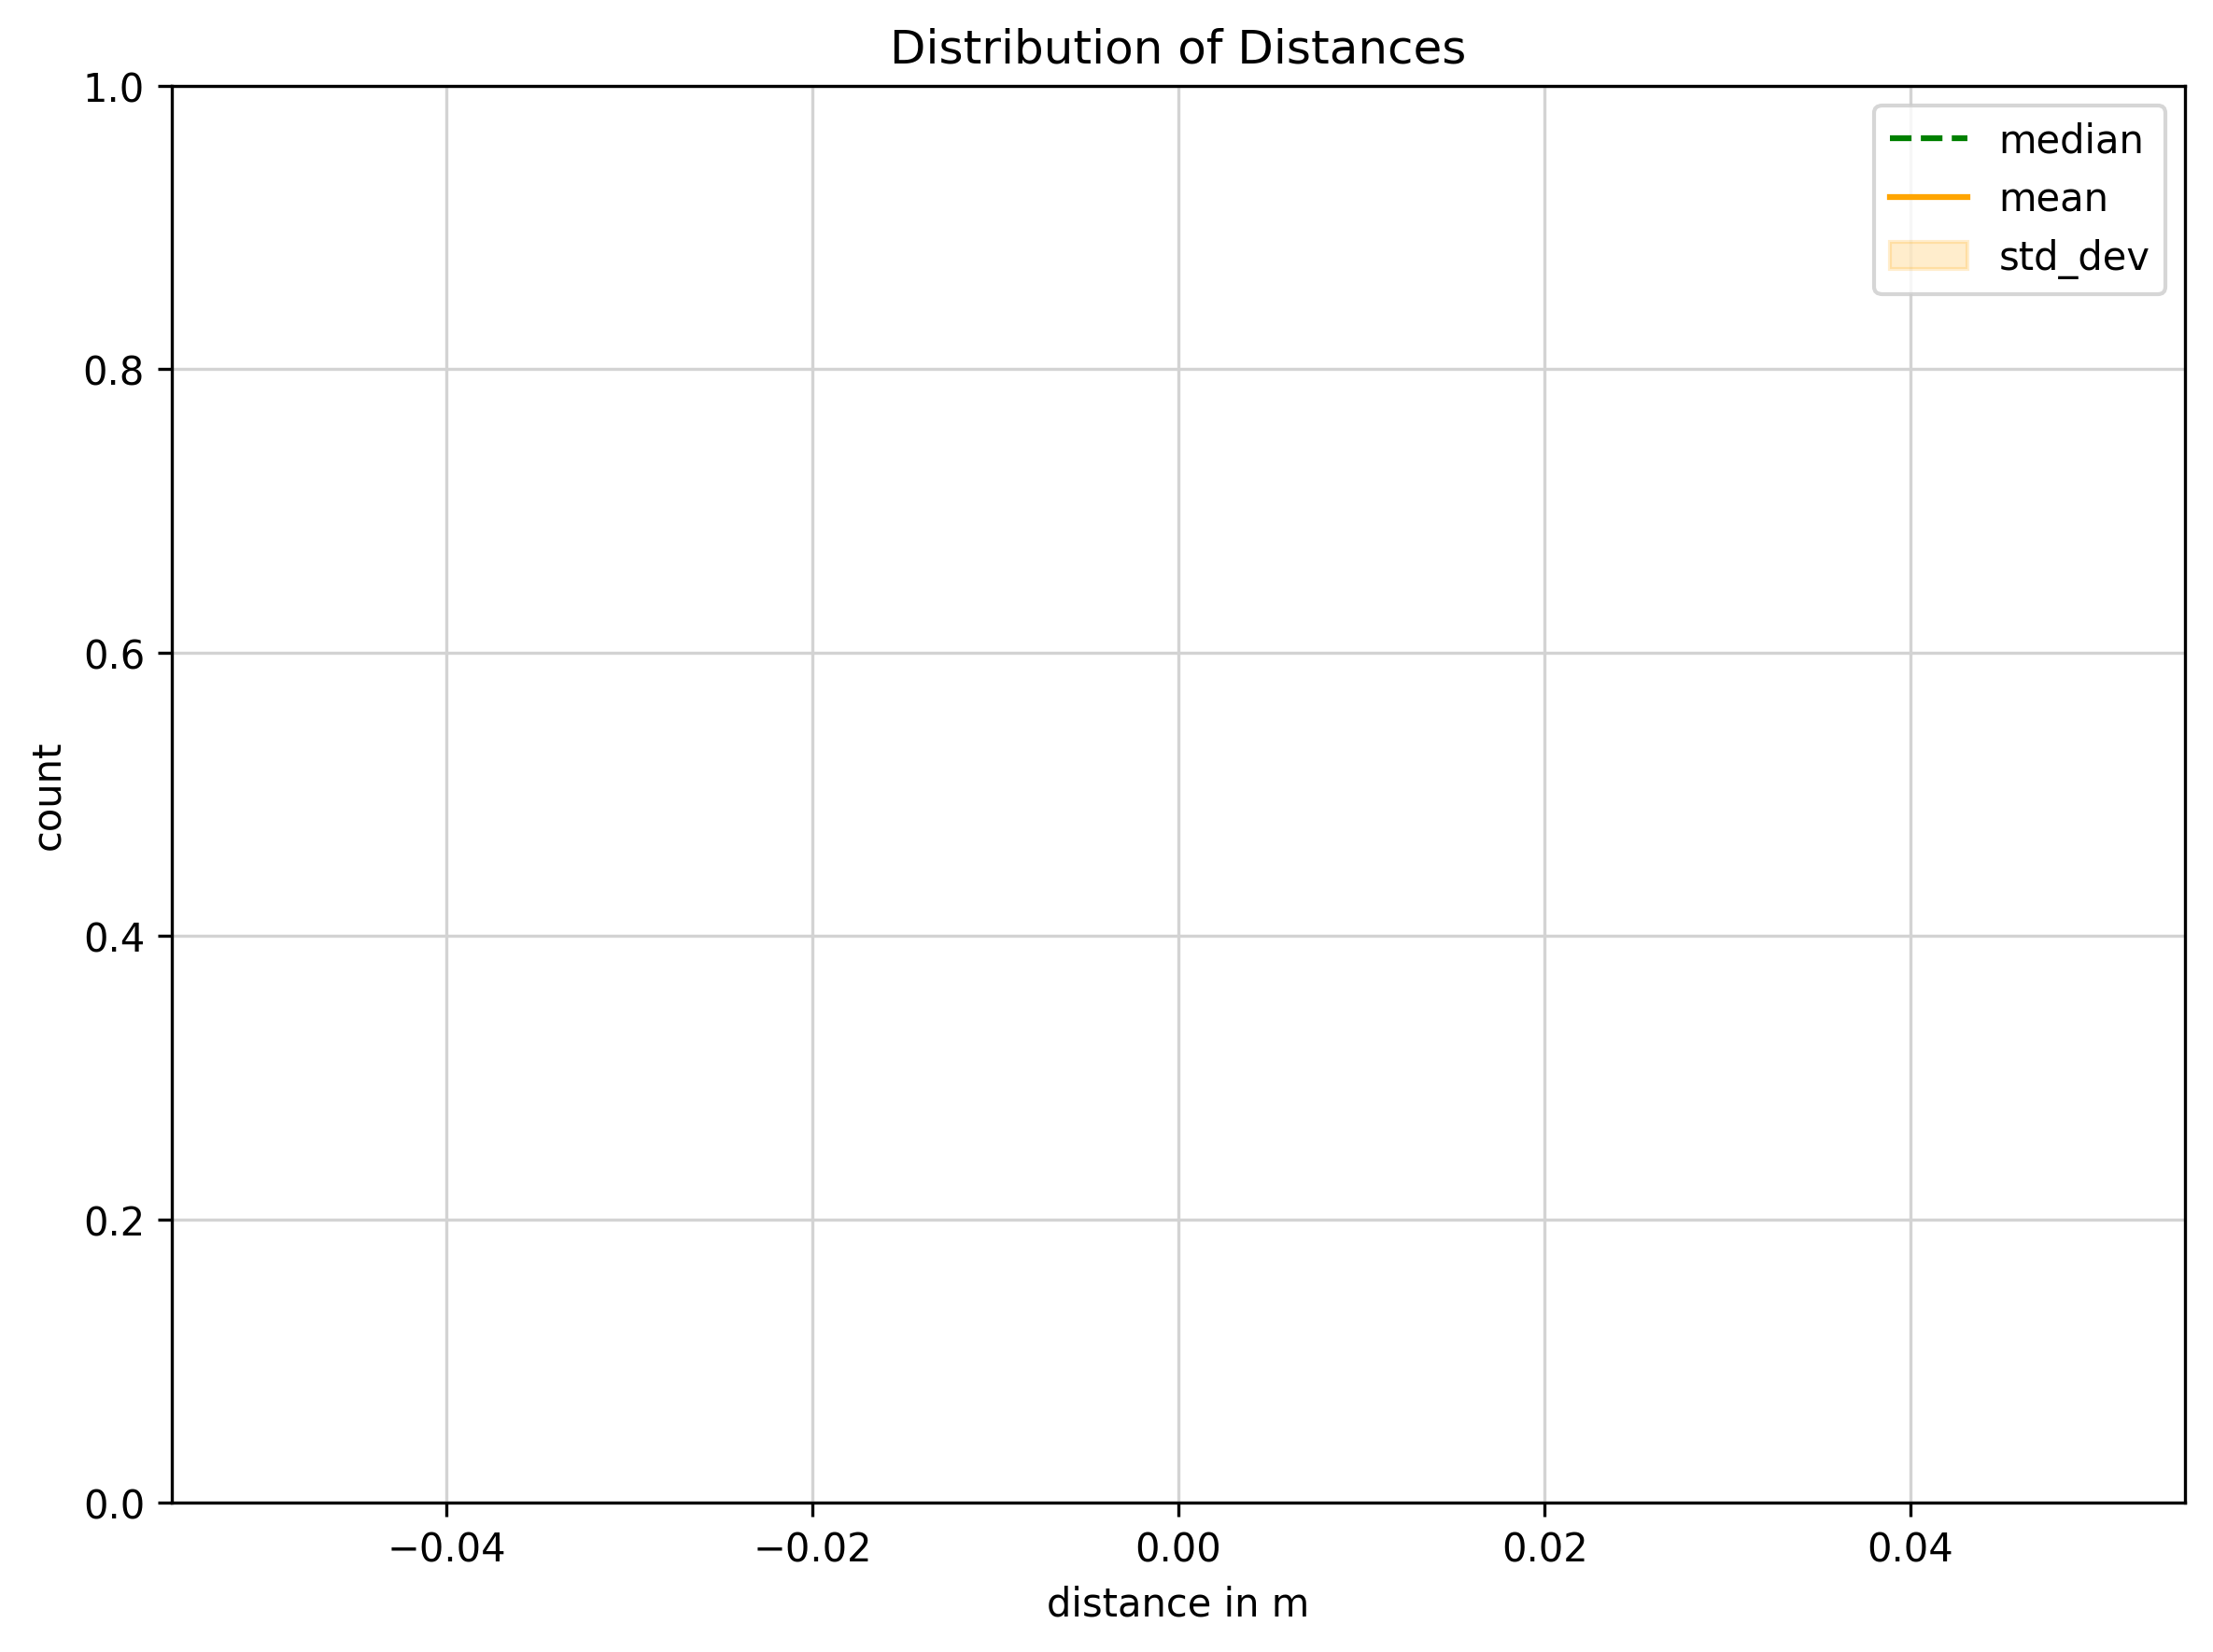

In [9]:
values = distances
values = values[values != 0]

mean = np.mean(values)
median = np.median(values)
std_dev = np.std(values)

values = values[values < 200]


fig = plt.figure(figsize=(8, 6), dpi=300)

ax = sns.histplot(values, color="blue", kde=True, zorder=2)


for line in ax.lines:
    line.set_color('crimson')
    
plt.grid(color="lightgrey", zorder=0)

ax.axvline(median, color='green', label='median', linestyle='--', zorder=3)
ax.axvline(mean, color='orange', label='mean', linestyle='-', zorder=3)
ax.axvspan(mean - std_dev, mean + std_dev, color='orange', alpha=0.2, zorder=1, label='std_dev')


# figure prettiness
plt.title('Distribution of Distances')
plt.xlabel('distance in m')
plt.ylabel('count')
plt.legend()

plt.tight_layout()

plt.show()


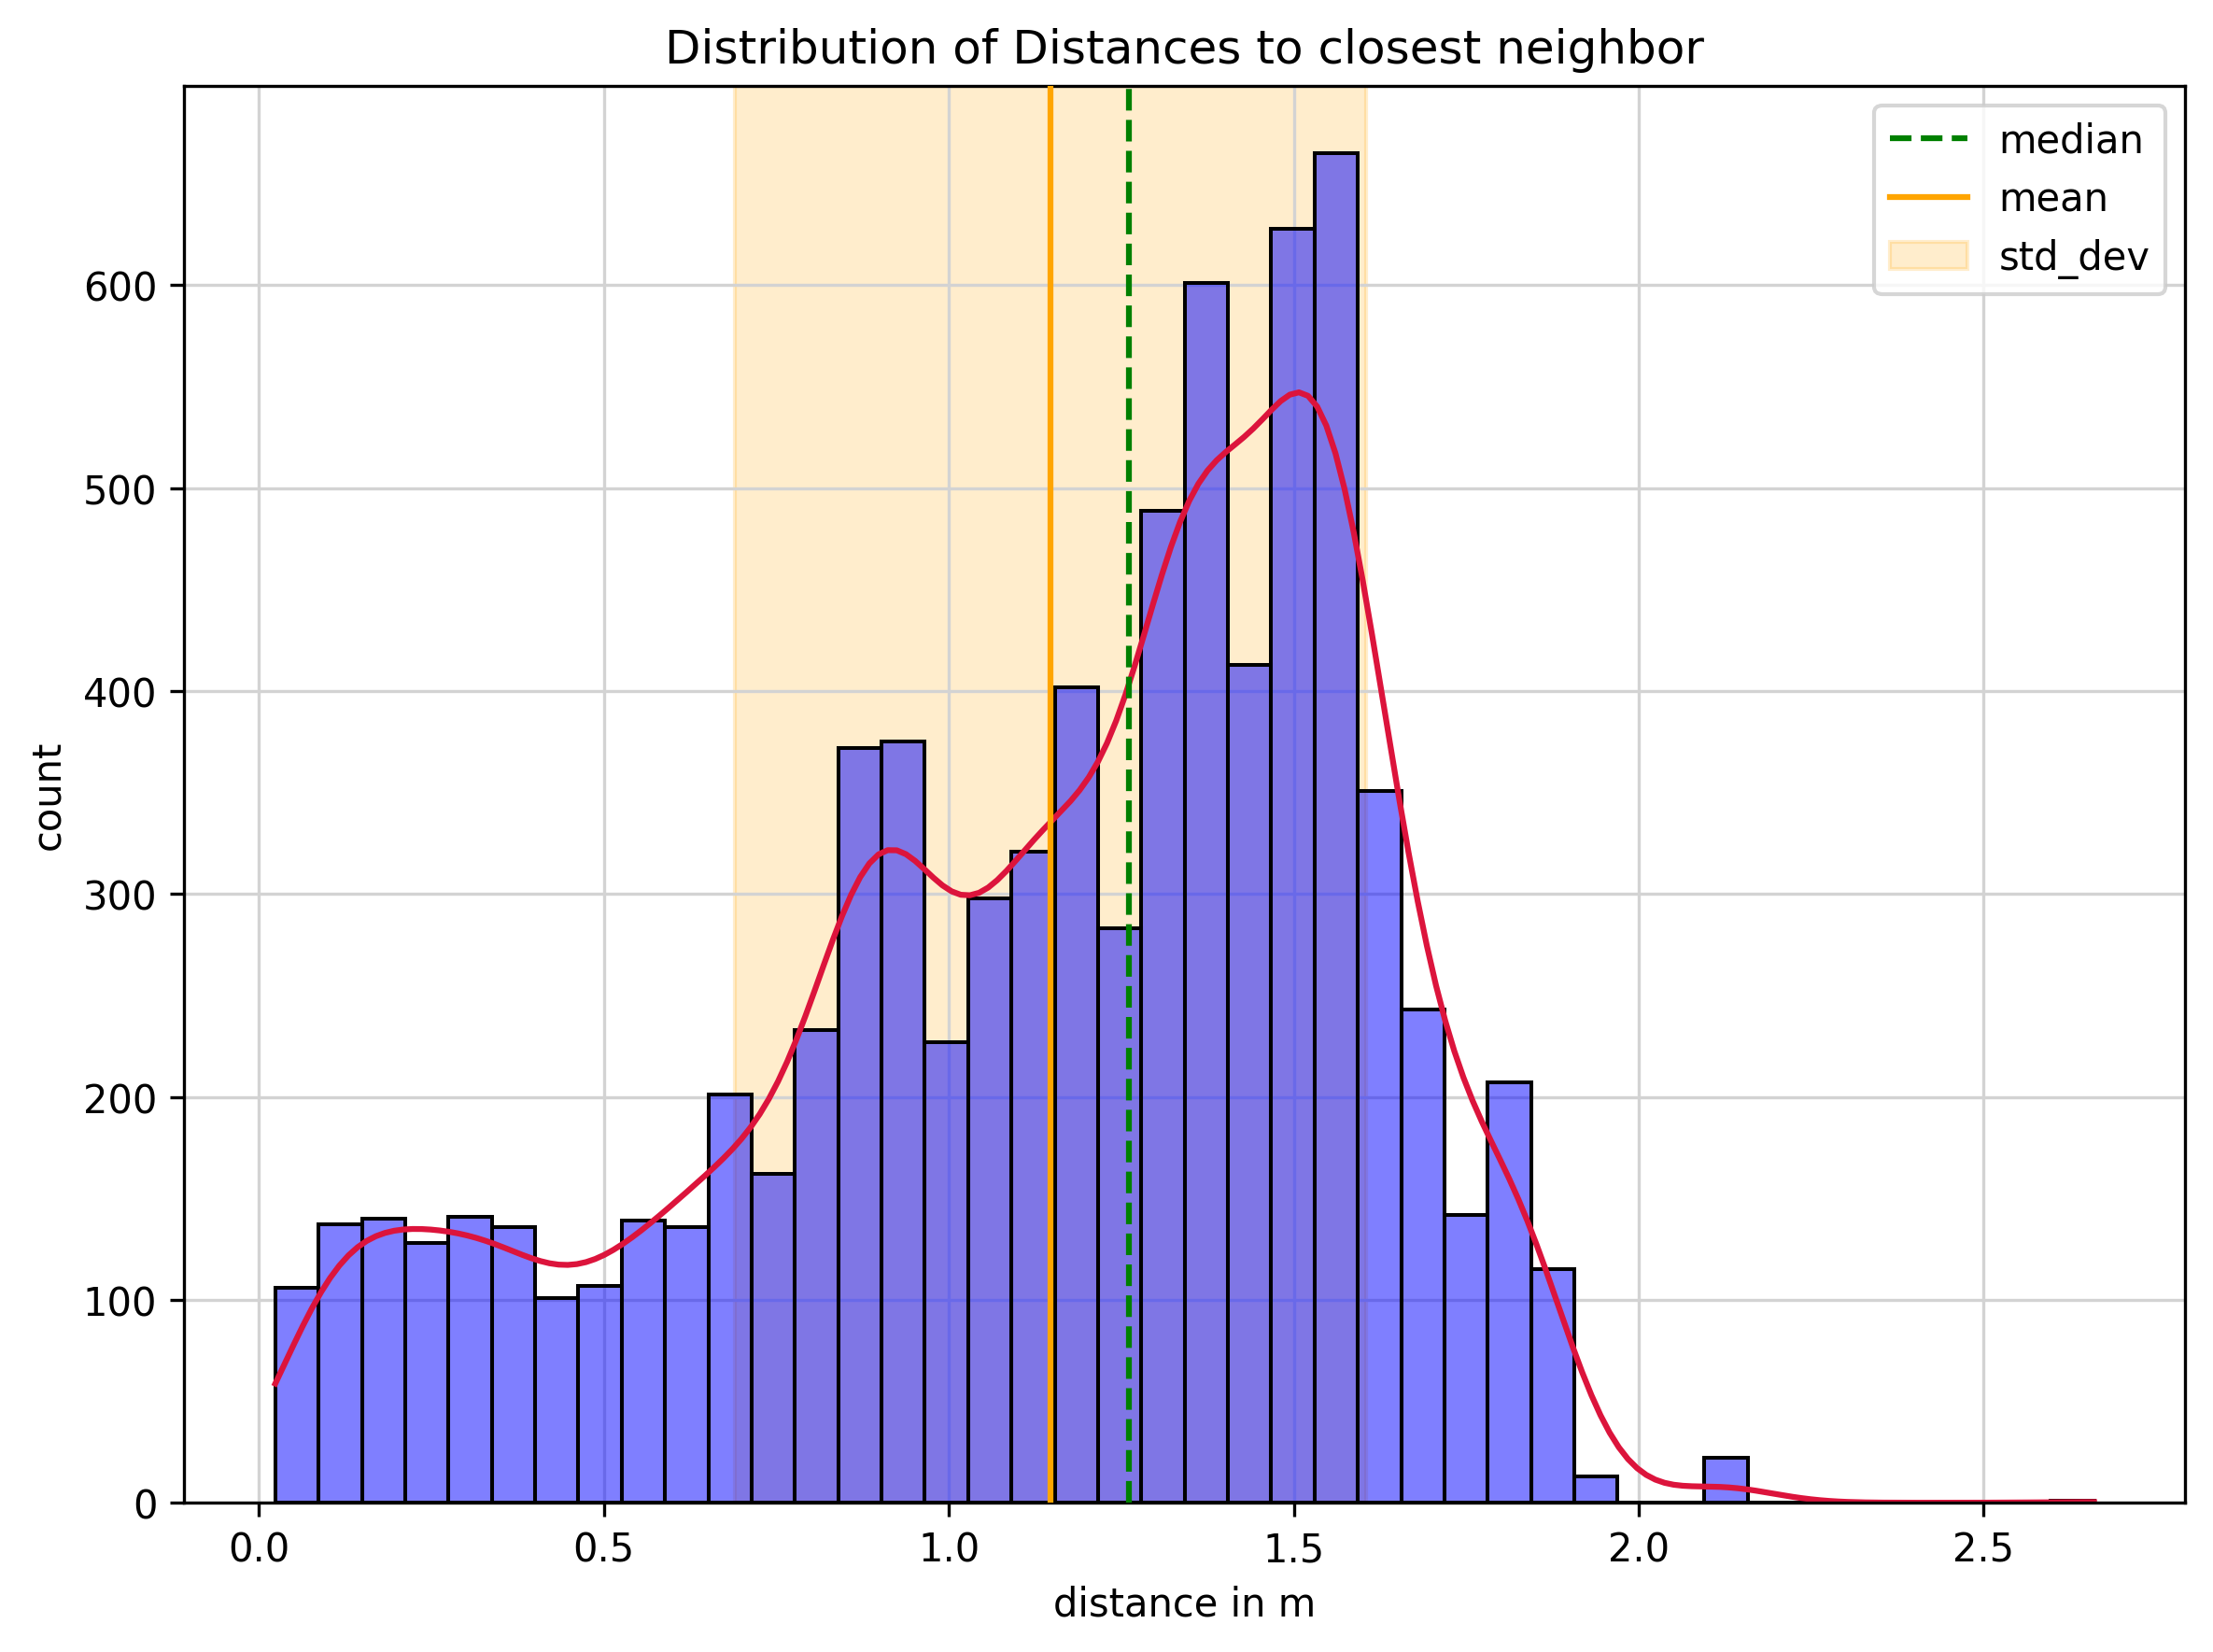

In [10]:
values = min_distances
values = values[values != 0]

mean = np.mean(values)
median = np.median(values)
std_dev = np.std(values)


fig = plt.figure(figsize=(8, 6), dpi=300)

ax = sns.histplot(values, color="blue", kde=True, zorder=2)


for line in ax.lines:
    line.set_color('crimson')
    
plt.grid(color="lightgrey", zorder=0)

ax.axvline(median, color='green', label='median', linestyle='--', zorder=3)
ax.axvline(mean, color='orange', label='mean', linestyle='-', zorder=3)
ax.axvspan(mean - std_dev, mean + std_dev, color='orange', alpha=0.2, zorder=1, label='std_dev')


# figure prettiness
plt.title('Distribution of Distances to closest neighbor')
plt.xlabel('distance in m')
plt.ylabel('count')
plt.legend()

plt.tight_layout()

plt.show()


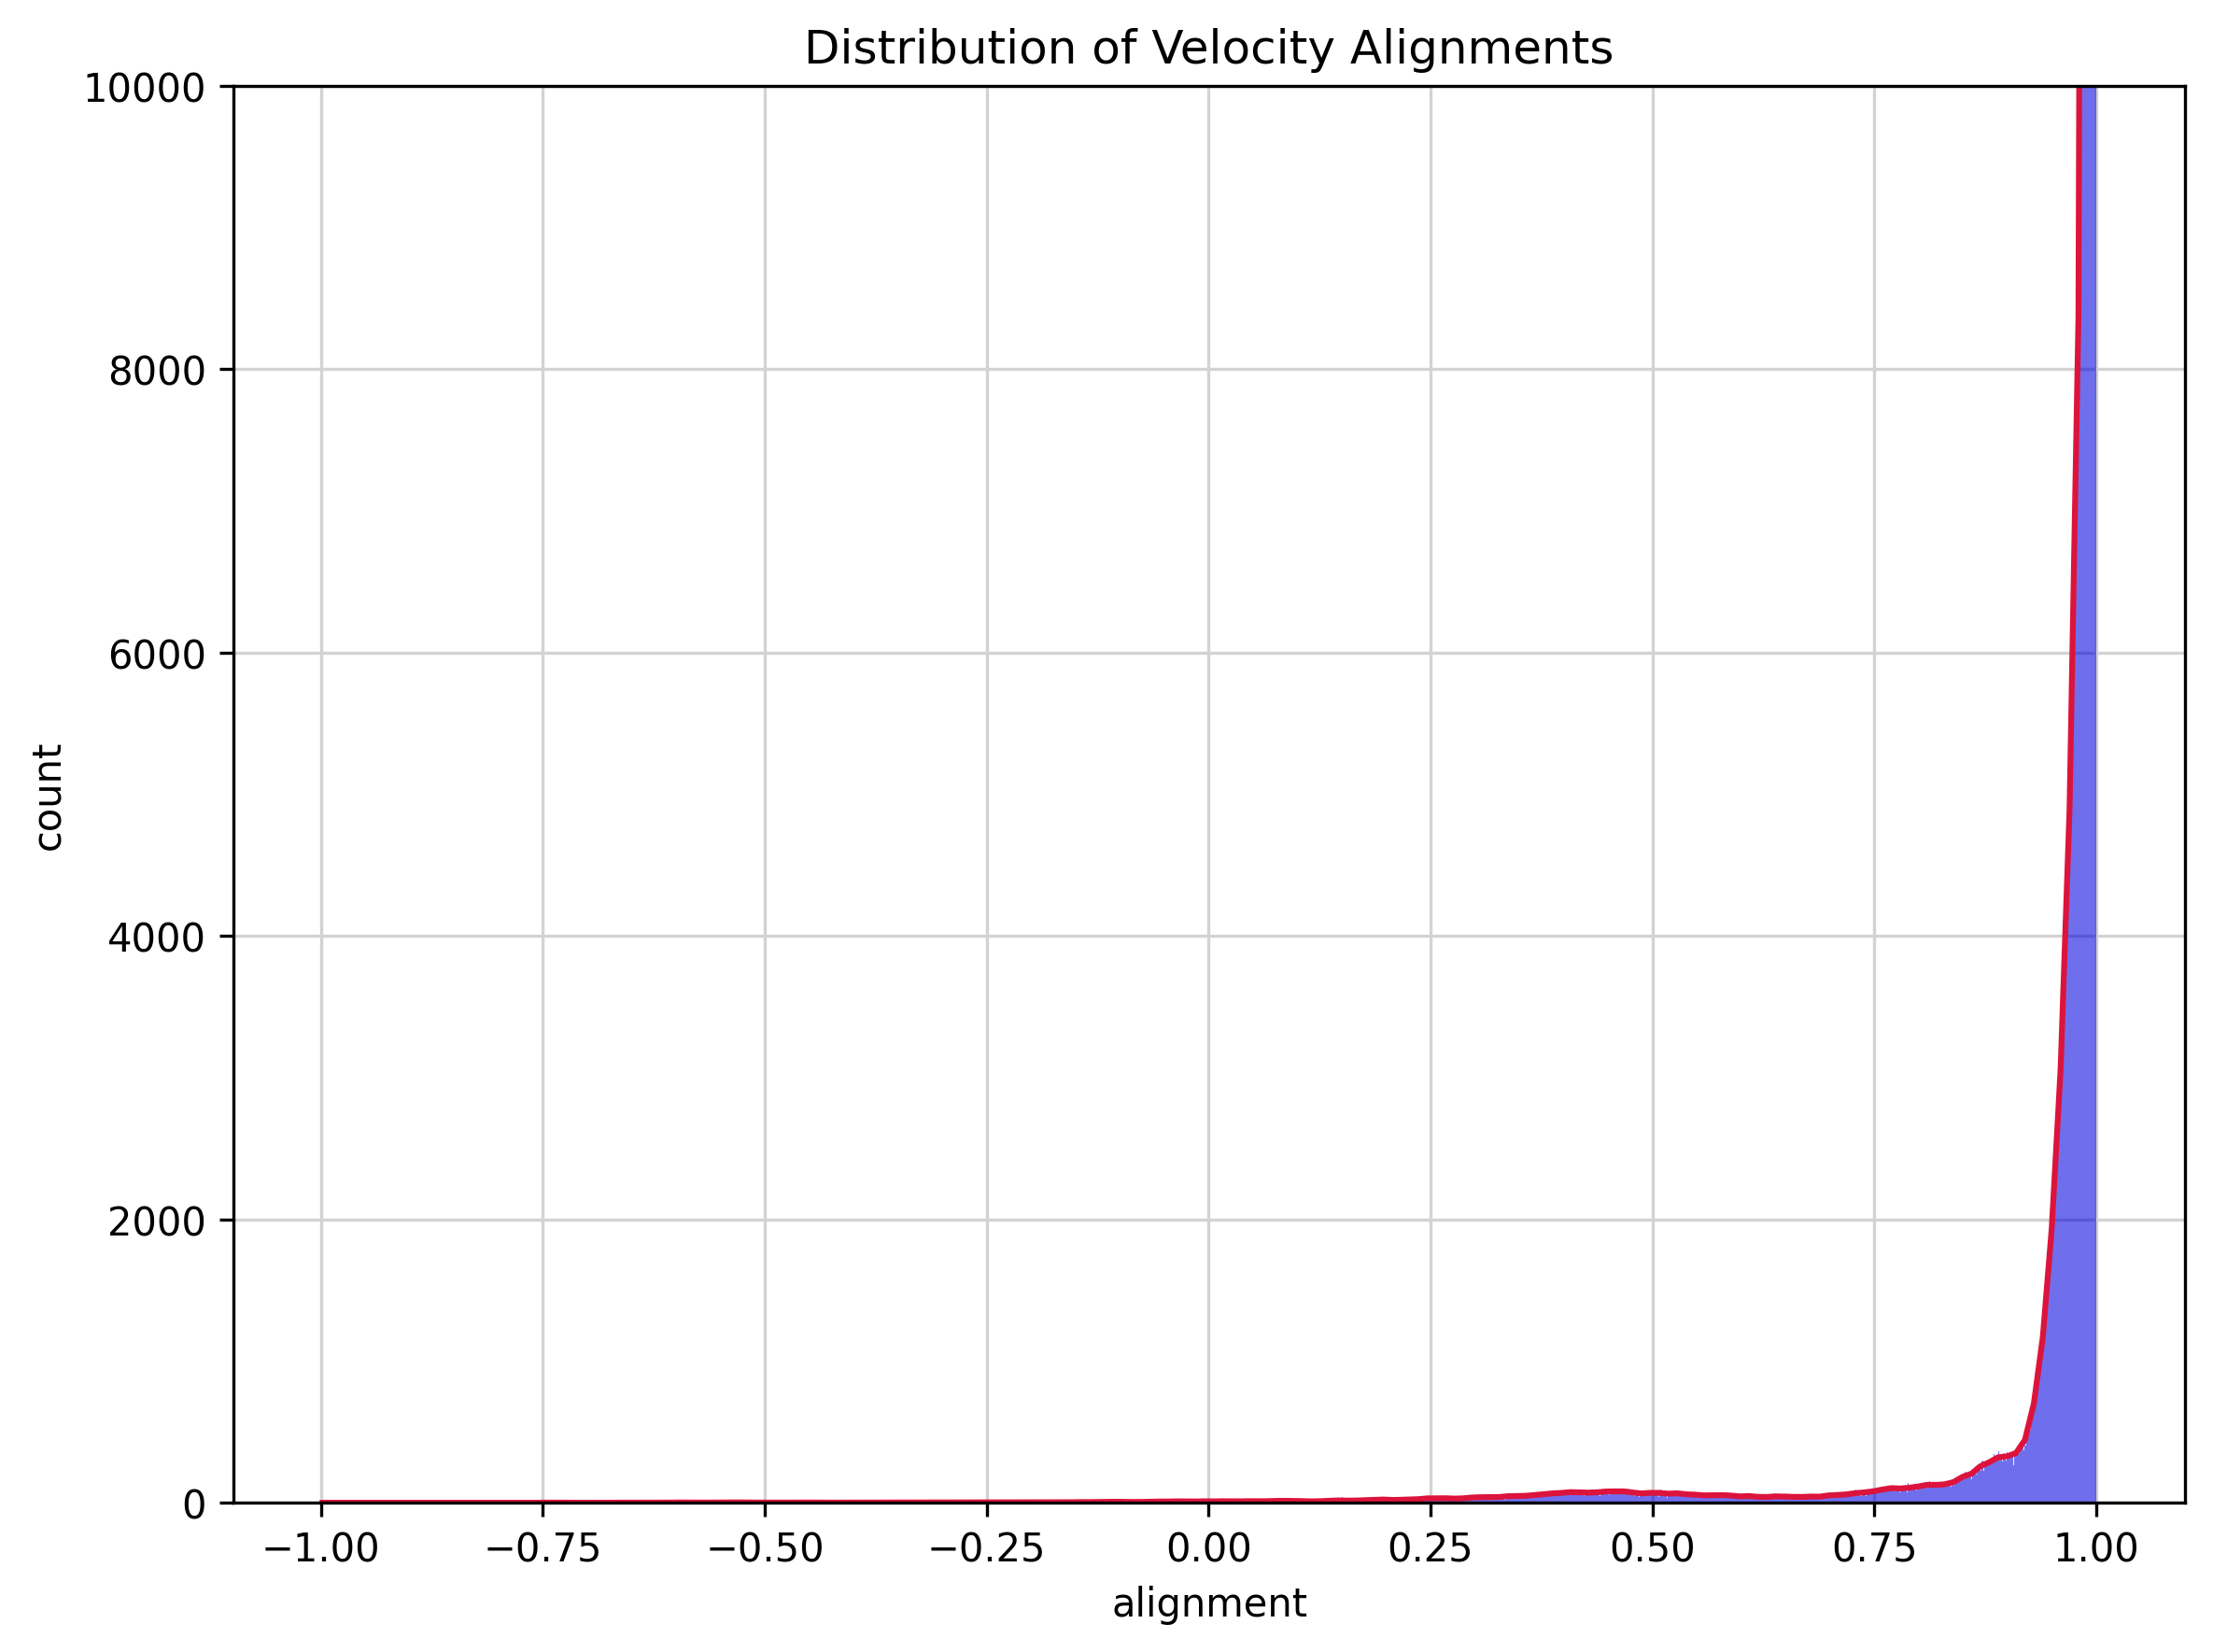

In [17]:

values = velocity_alignments
values = values[values != 0]

fig = plt.figure(figsize=(8, 6), dpi=300)

ax = sns.histplot(values, color="blue", kde=True, zorder=2)


for line in ax.lines:
    line.set_color('crimson')
    
plt.grid(color="lightgrey", zorder=0)


# figure prettiness
plt.title('Distribution of Velocity Alignments')
plt.xlabel('alignment')
plt.ylabel('count')

plt.ylim(0, 1e4 * 1)

plt.tight_layout()

plt.show()


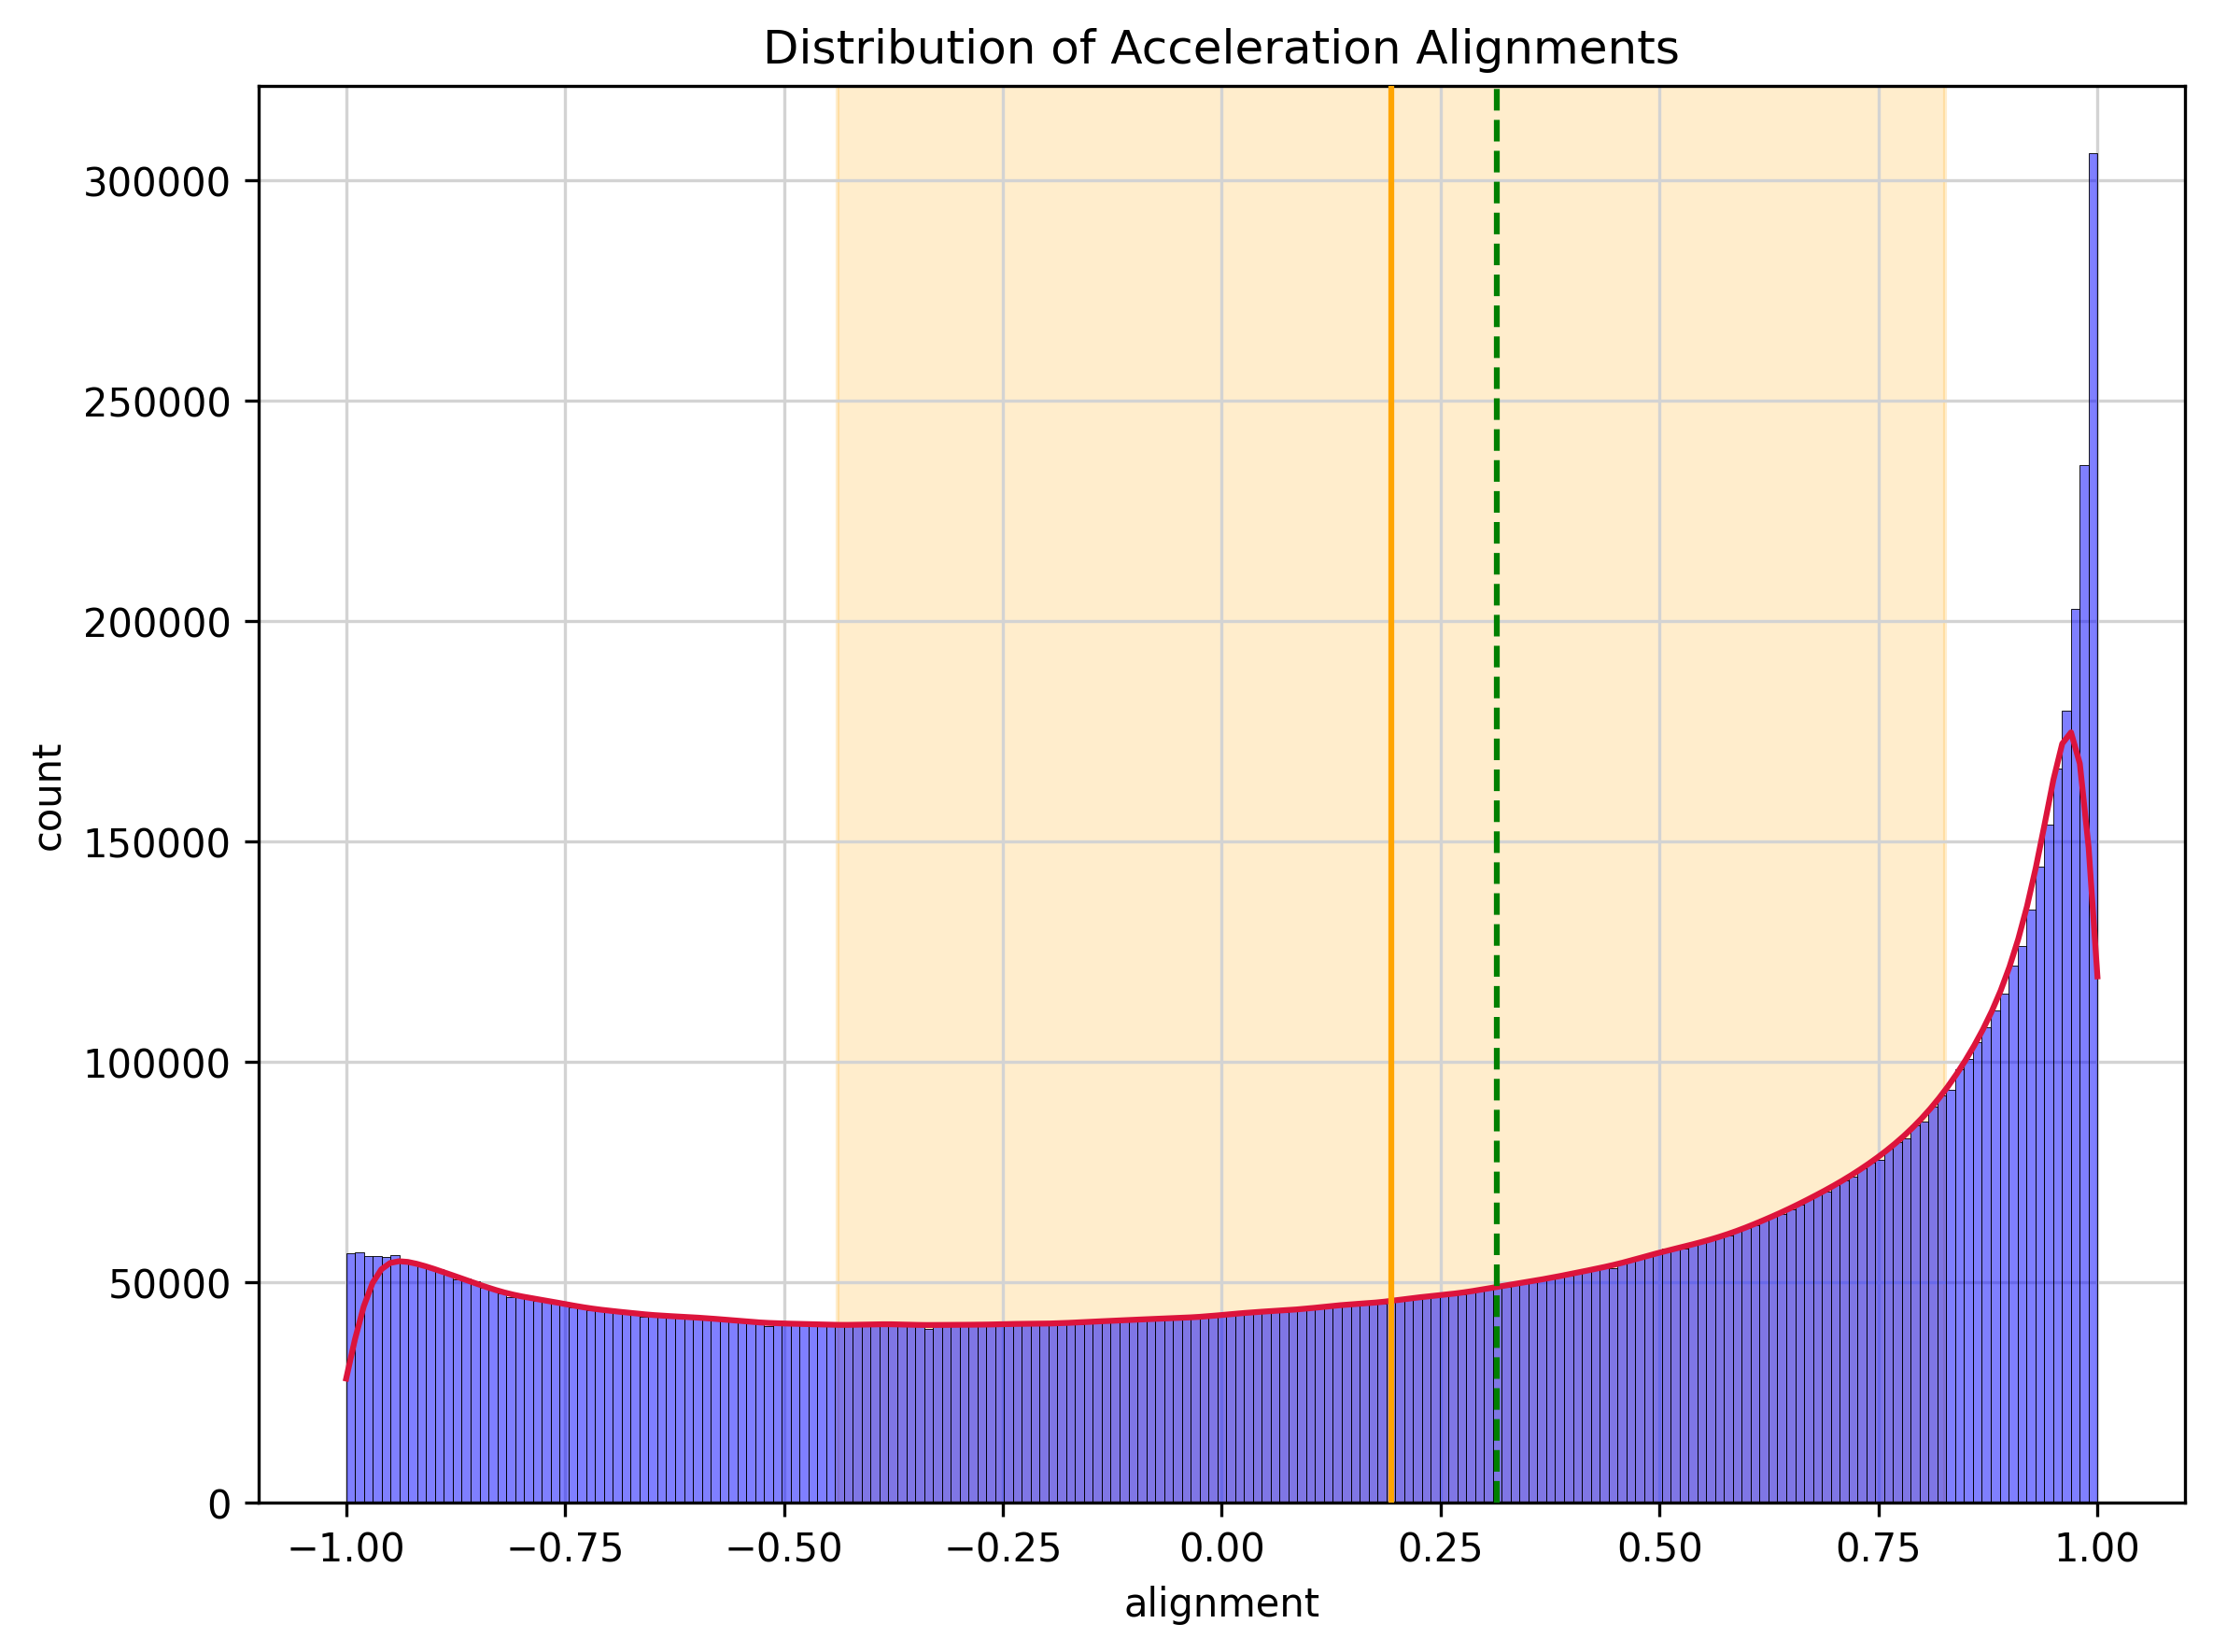

In [12]:
values = acceleration_alignments
values = values[values != 0]

mean = np.mean(values)
median = np.median(values)
std_dev = np.std(values)


fig = plt.figure(figsize=(8, 6), dpi=300)

ax = sns.histplot(values, color="blue", kde=True, zorder=2)


for line in ax.lines:
    line.set_color('crimson')
    
plt.grid(color="lightgrey", zorder=0)

ax.axvline(median, color='green', label='median', linestyle='--', zorder=3)
ax.axvline(mean, color='orange', label='mean', linestyle='-', zorder=3)
ax.axvspan(mean - std_dev, mean + std_dev, color='orange', alpha=0.2, zorder=1, label='std_dev')


# figure prettiness
plt.title('Distribution of Acceleration Alignments')
plt.xlabel('alignment')
plt.ylabel('count')


plt.tight_layout()

plt.show()

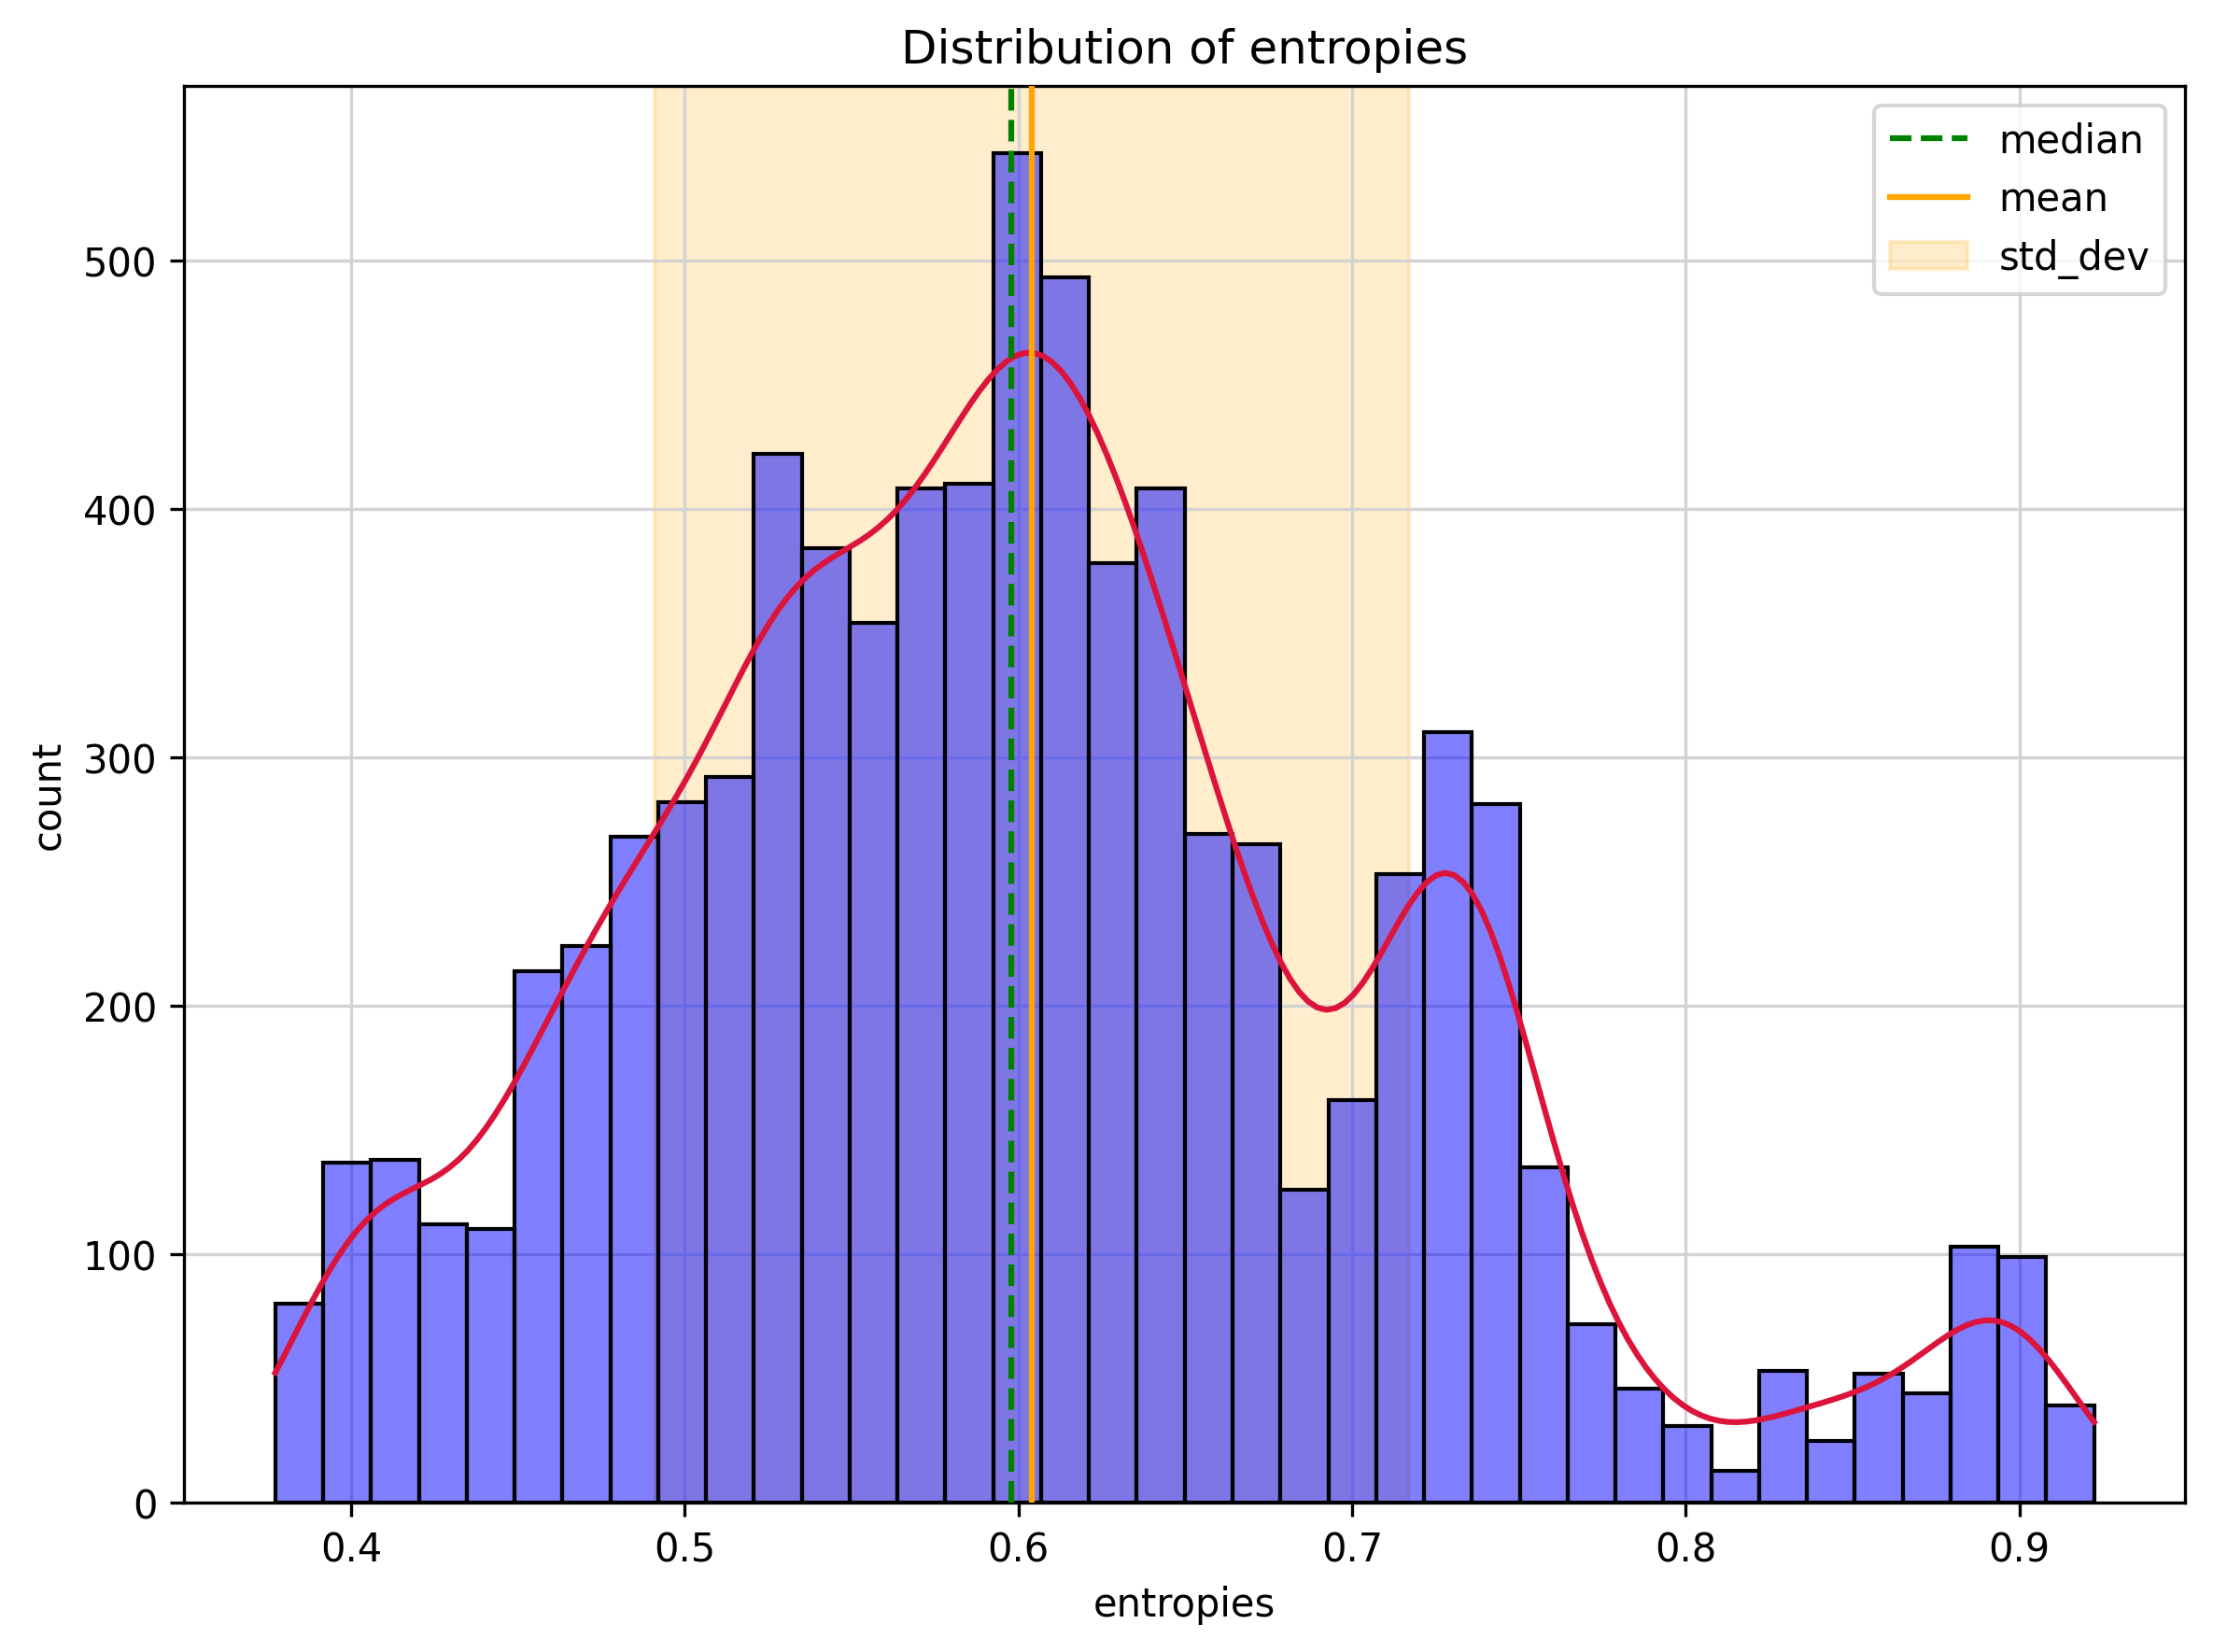

In [13]:
values = entropies
values = values[values != 0]

mean = np.mean(values)
median = np.median(values)
std_dev = np.std(values)

fig = plt.figure(figsize=(8, 6), dpi=300)

ax = sns.histplot(values, color="blue", kde=True, zorder=2)


for line in ax.lines:
    line.set_color('crimson')
    
plt.grid(color="lightgrey", zorder=0)

ax.axvline(median, color='green', label='median', linestyle='--', zorder=3)
ax.axvline(mean, color='orange', label='mean', linestyle='-', zorder=3)
ax.axvspan(mean - std_dev, mean + std_dev, color='orange', alpha=0.2, zorder=1, label='std_dev')


# figure prettiness
plt.title('Distribution of entropies')
plt.xlabel('entropies')
plt.ylabel('count')
plt.legend()

plt.tight_layout()

plt.show()


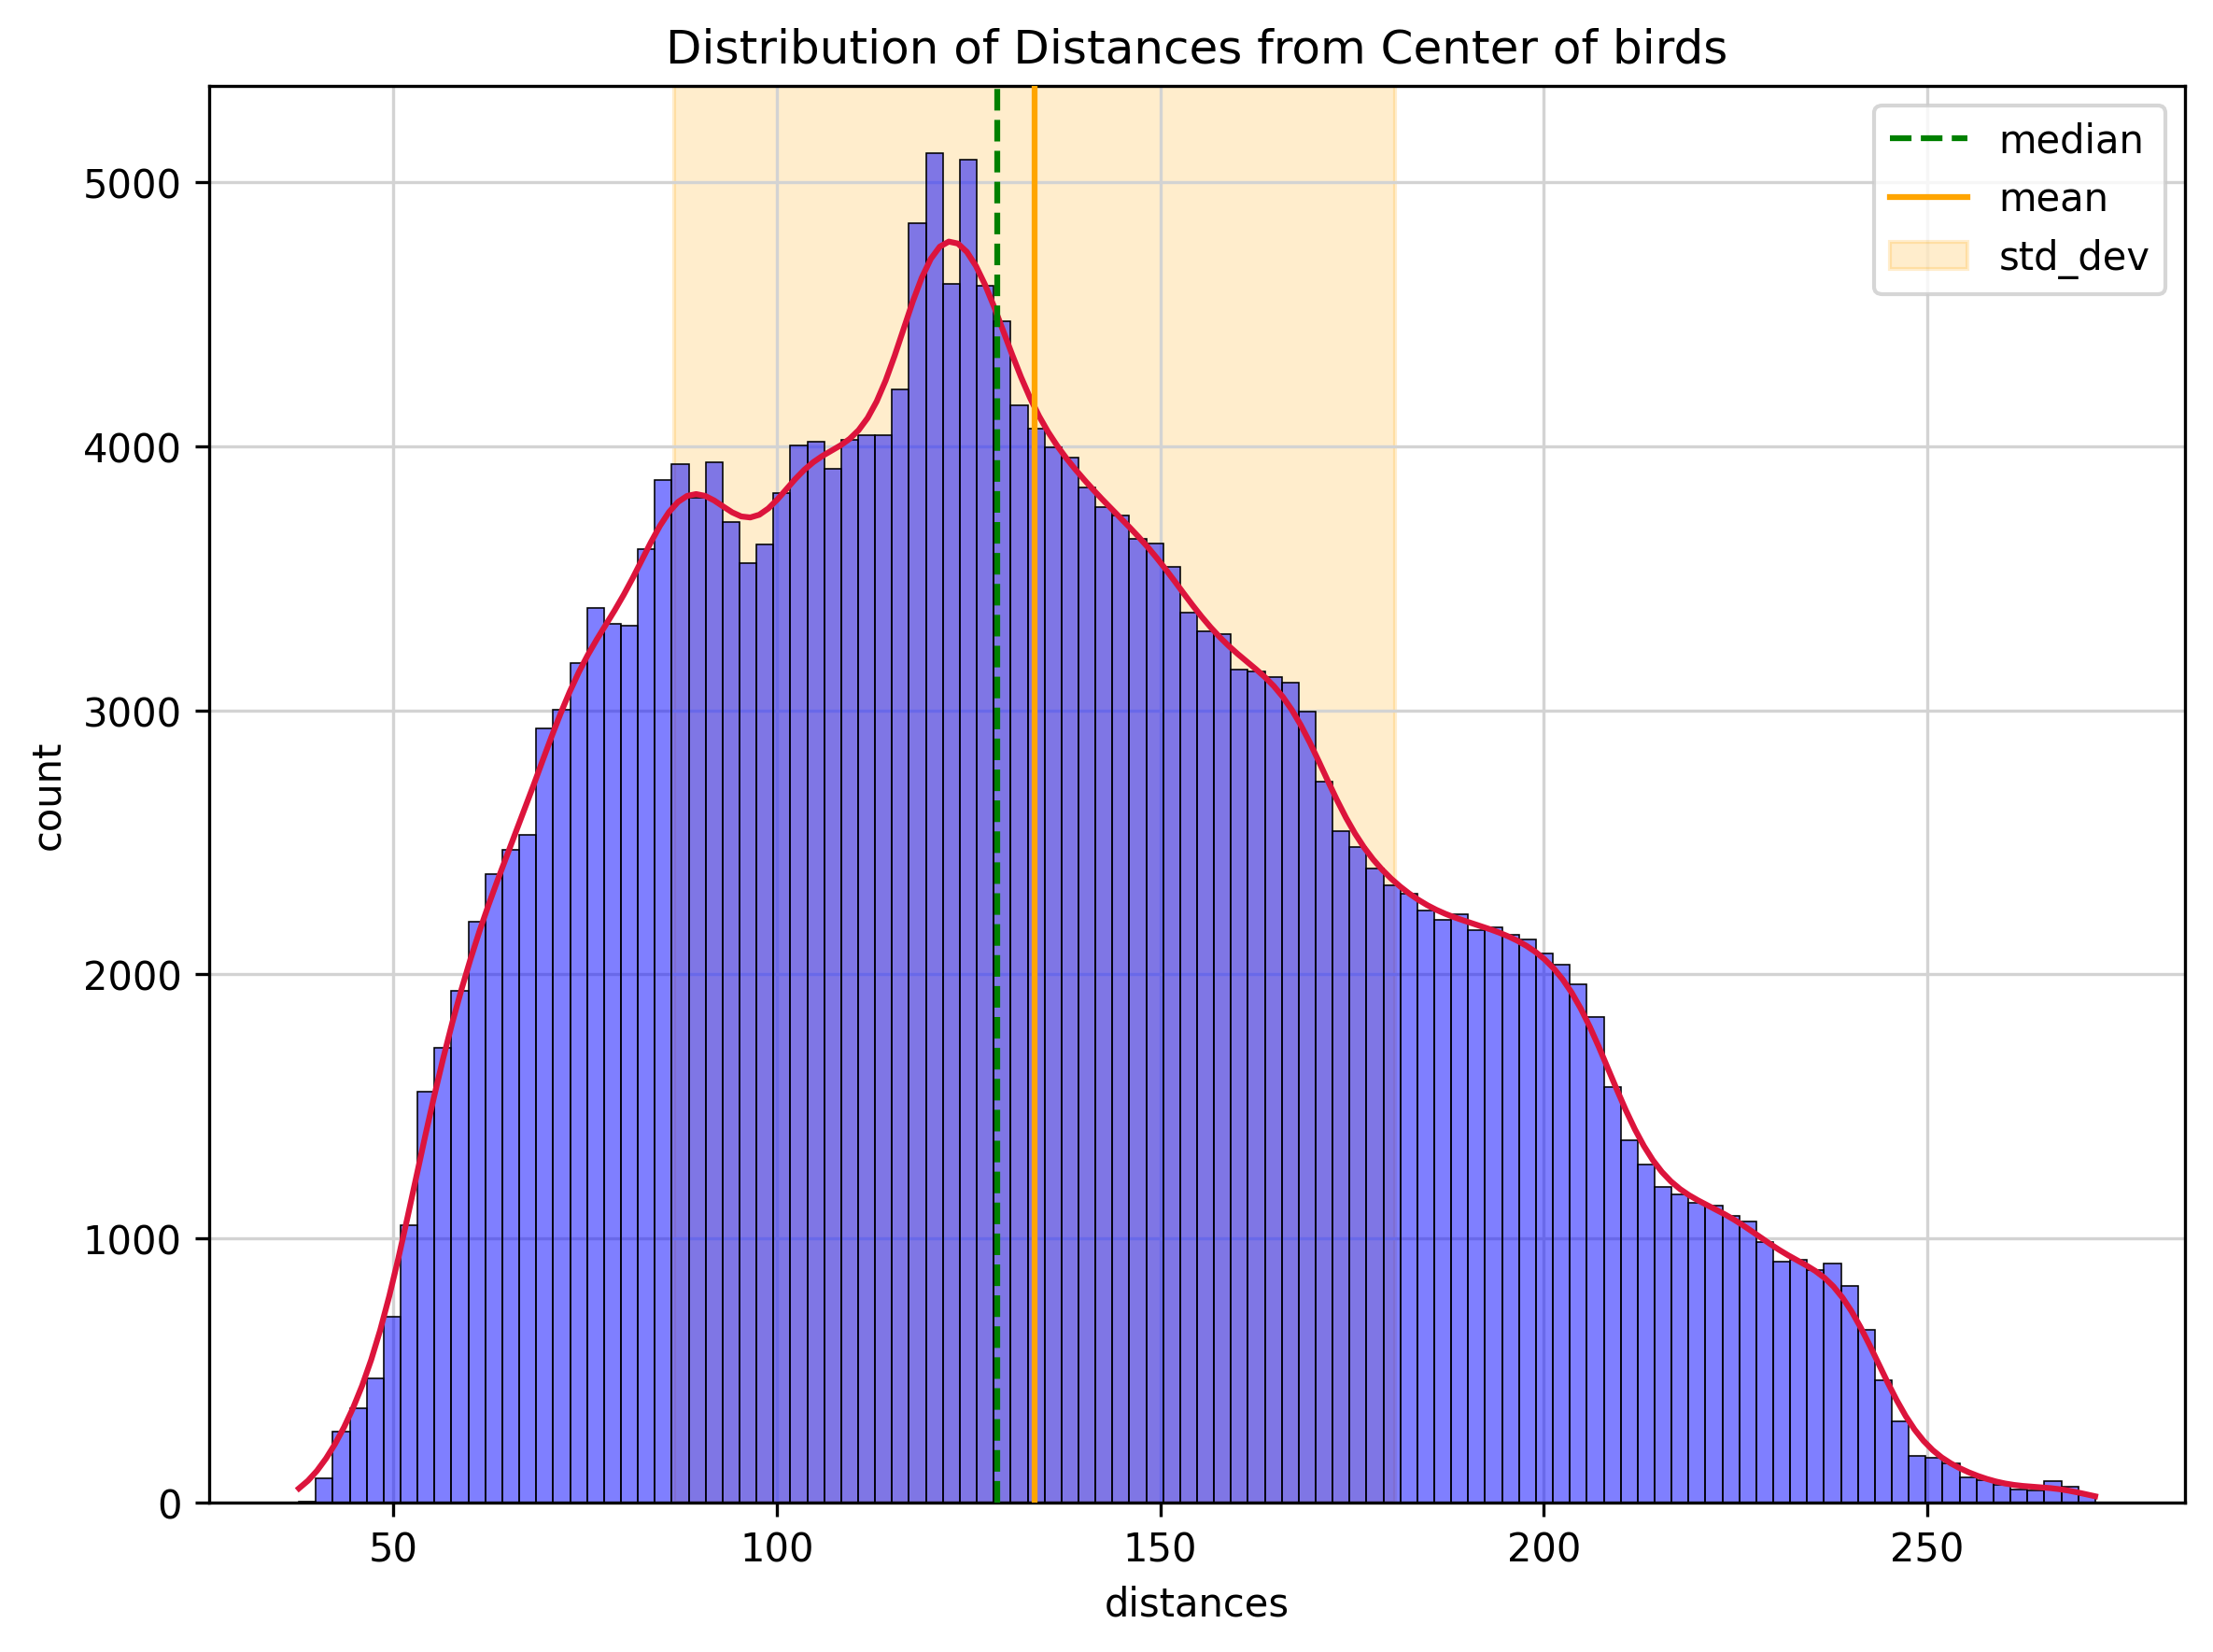

In [14]:
values = distances_from_center
values = values[values != 0]

mean = np.mean(values)
median = np.median(values)
std_dev = np.std(values)

fig = plt.figure(figsize=(8, 6), dpi=300)

ax = sns.histplot(values, color="blue", kde=True, zorder=2)


for line in ax.lines:
    line.set_color('crimson')
    
plt.grid(color="lightgrey", zorder=0)

ax.axvline(median, color='green', label='median', linestyle='--', zorder=3)
ax.axvline(mean, color='orange', label='mean', linestyle='-', zorder=3)
ax.axvspan(mean - std_dev, mean + std_dev, color='orange', alpha=0.2, zorder=1, label='std_dev')


# figure prettiness
plt.title('Distribution of Distances from Center of birds')
plt.xlabel('distances')
plt.ylabel('count')
plt.legend()

plt.tight_layout()

plt.show()

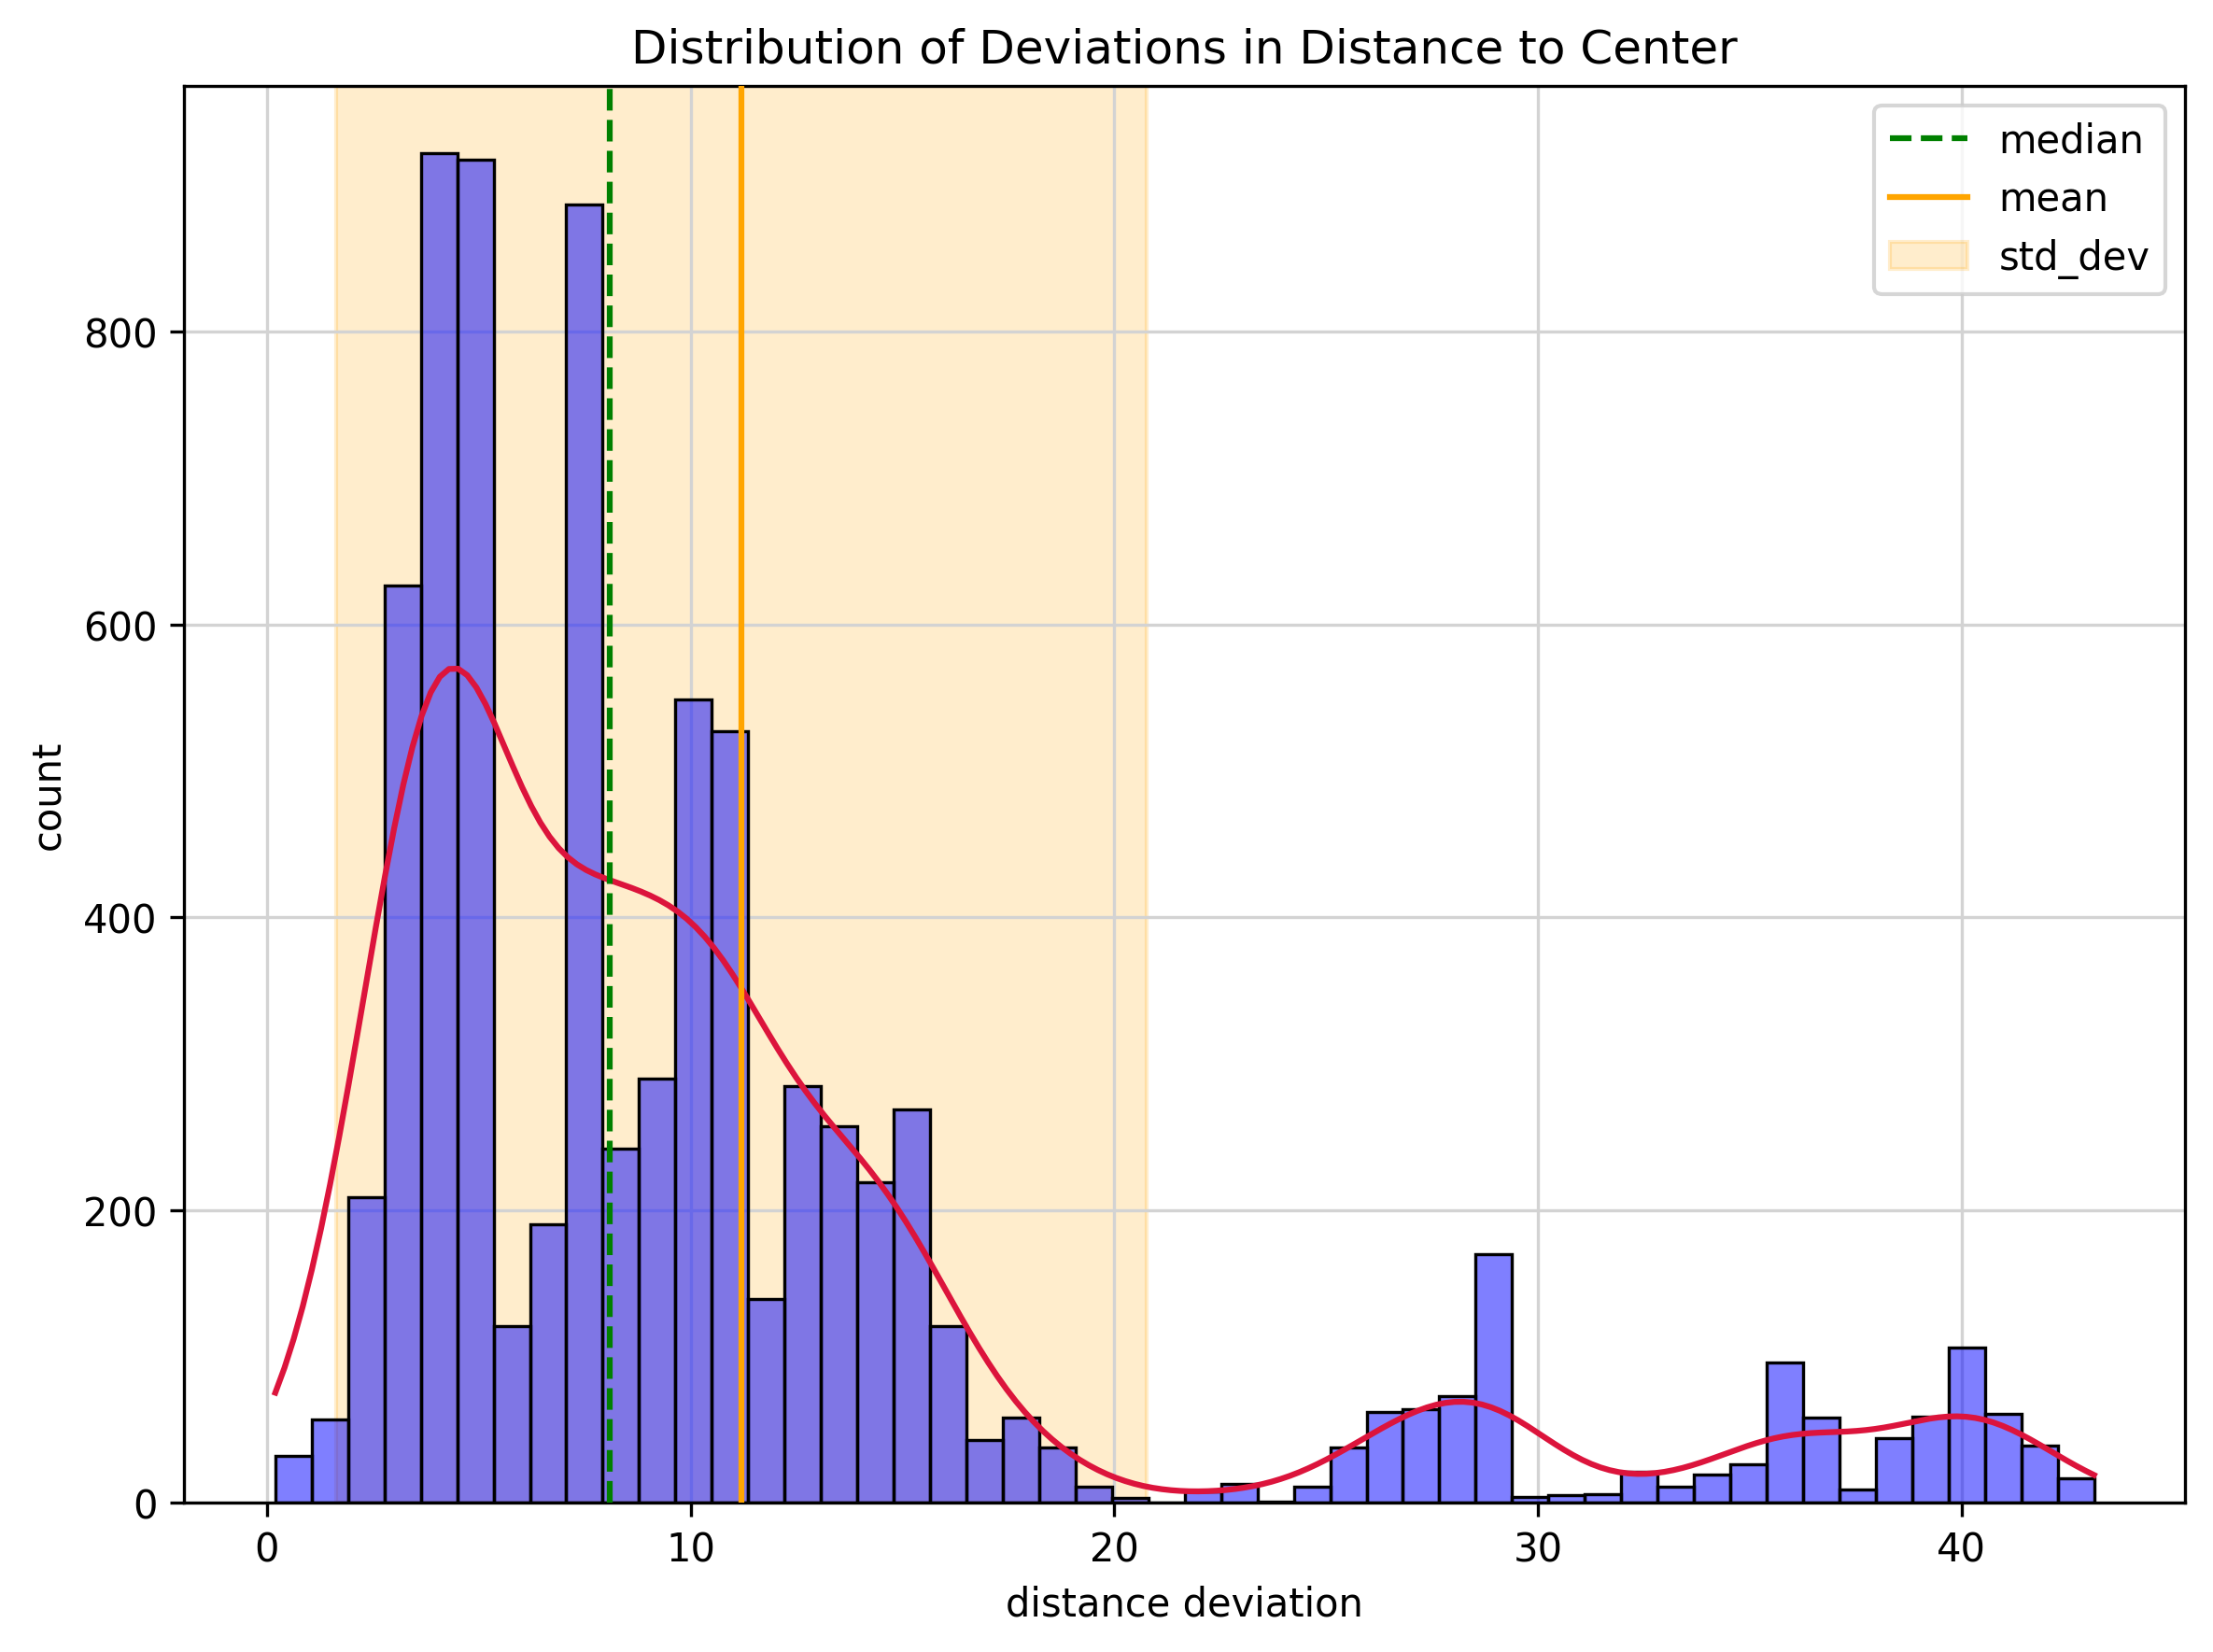

In [15]:
values = distance_spreads
values = values[values != 0]

mean = np.mean(values)
median = np.median(values)
std_dev = np.std(values)

fig = plt.figure(figsize=(8, 6), dpi=300)

ax = sns.histplot(values, color="blue", kde=True, zorder=2)


for line in ax.lines:
    line.set_color('crimson')
    
plt.grid(color="lightgrey", zorder=0)

ax.axvline(median, color='green', label='median', linestyle='--', zorder=3)
ax.axvline(mean, color='orange', label='mean', linestyle='-', zorder=3)
ax.axvspan(mean - std_dev, mean + std_dev, color='orange', alpha=0.2, zorder=1, label='std_dev')


# figure prettiness
plt.title('Distribution of Deviations in Distance to Center')
plt.xlabel('distance deviation')
plt.ylabel('count')
plt.legend()

plt.tight_layout()

plt.show()

In [16]:
print(distance_spreads)

[1.28054429 1.27887388 1.27727226 ... 2.76085698 2.76166332 2.57883661]
